In [4]:
#Import all necessary Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy.stats import norm
from scipy import stats

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Data Preprocessing

dataset source: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

In [5]:
#Import dataset
df_train = pd.read_csv('ds_project3_train.csv')
df_test = pd.read_csv('ds_project3_test.csv')

#Check the train dataset
print(df_train.info())
df_train.head().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,RL,RL,RL,RL,RL
LotFrontage,65.0,80.0,68.0,60.0,84.0
LotArea,8450,9600,11250,9550,14260
...,...,...,...,...,...
MoSold,2,5,9,2,12
YrSold,2008,2007,2008,2006,2008
SaleType,WD,WD,WD,WD,WD
SaleCondition,Normal,Normal,Normal,Abnorml,Normal


In [6]:
#Check test dataset
print(df_test.info())
df_test.head().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

,0,1,2,3,4
Id,1461,1462,1463,1464,1465
MSSubClass,20,20,60,60,120
MSZoning,RH,RL,RL,RL,RL
LotFrontage,80.0,81.0,74.0,78.0,43.0
LotArea,11622,14267,13830,9978,5005
...,...,...,...,...,...
MiscVal,0,12500,0,0,0
MoSold,6,6,3,6,1
YrSold,2010,2010,2010,2010,2010
SaleType,WD,WD,WD,WD,WD


In [7]:
print("List of Data Train Features: " + str(df_train.columns))
print("List of Data Test Features: " + str(df_test.columns))

List of Data Train Features: Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
   

In [8]:
#Let's choose only 9 features which SalePrice will be target variable
features = ['LotArea','YearBuilt','OverallQual', 'OverallCond','GrLivArea','MiscFeature','GarageArea',\
                     'KitchenQual', 'SalePrice']
df_train = df_train[features]
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   LotArea      1460 non-null   int64 
 1   YearBuilt    1460 non-null   int64 
 2   OverallQual  1460 non-null   int64 
 3   OverallCond  1460 non-null   int64 
 4   GrLivArea    1460 non-null   int64 
 5   MiscFeature  54 non-null     object
 6   GarageArea   1460 non-null   int64 
 7   KitchenQual  1460 non-null   object
 8   SalePrice    1460 non-null   int64 
dtypes: int64(7), object(2)
memory usage: 102.8+ KB


In [9]:
#Let's choose the same feature for test dataset except SalePrice
df_test = df_test[features[:-1]] #Since SalePrice column is absent in df_test
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotArea      1459 non-null   int64  
 1   YearBuilt    1459 non-null   int64  
 2   OverallQual  1459 non-null   int64  
 3   OverallCond  1459 non-null   int64  
 4   GrLivArea    1459 non-null   int64  
 5   MiscFeature  51 non-null     object 
 6   GarageArea   1458 non-null   float64
 7   KitchenQual  1458 non-null   object 
dtypes: float64(1), int64(5), object(2)
memory usage: 91.3+ KB


### Let's Look deeper into train dataset

In [10]:
df_train['OverallQual'].unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

In [11]:
df_train['MiscFeature'].value_counts()

MiscFeature
Shed    49
Gar2     2
Othr     2
TenC     1
Name: count, dtype: int64

In [12]:
df_train.describe()

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,GarageArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,1971.267808,6.099315,5.575342,1515.463699,472.980137,180921.195890
std,9981.264932,30.202904,1.382997,1.112799,525.480383,213.804841,79442.502883
min,1300.000000,1872.000000,1.000000,1.000000,334.000000,0.000000,34900.000000
25%,7553.500000,1954.000000,5.000000,5.000000,1129.500000,334.500000,129975.000000
50%,9478.500000,1973.000000,6.000000,5.000000,1464.000000,480.000000,163000.000000
75%,11601.500000,2000.000000,7.000000,6.000000,1776.750000,576.000000,214000.000000
max,215245.000000,2010.000000,10.000000,9.000000,5642.000000,1418.000000,755000.000000


<Axes: xlabel='SalePrice', ylabel='Count'>

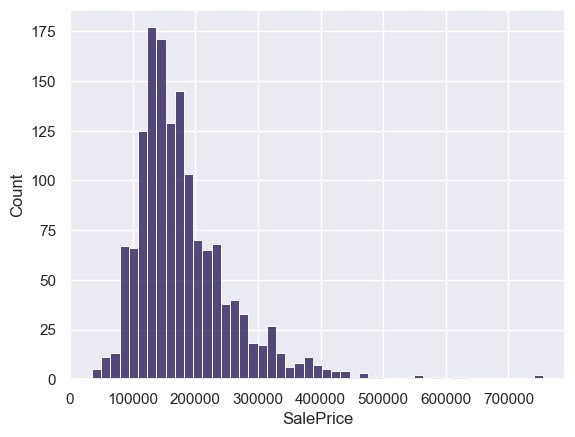

In [13]:
sns.set_theme(palette='magma')
sns.histplot(df_train['SalePrice']) # distribusi kolom SalePrice

In [14]:
# hitung nilai skewness dan kurtosisnya
# skewness: ukuran statistik yang digunakan untuk mengukur sejauh mana distribusi data cenderung miring atau tidak simetris
# Kurtosis: ukuran statistik yang digunakan untuk mengukur sejauh mana distribusi data cenderung 
# memiliki ekor panjang (outliers) dan puncak tajam (peakedness) dibandingkan dengan distribusi normal 
# (distribusi Gauss atau distribusi berbentuk lonceng). 

print(f"Skewness: {df_train['SalePrice'].skew()}")
print(f"Kurtosis: {df_train['SalePrice'].kurt()}")

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


### ScatterPlot GrLivArea terhadap target variable

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

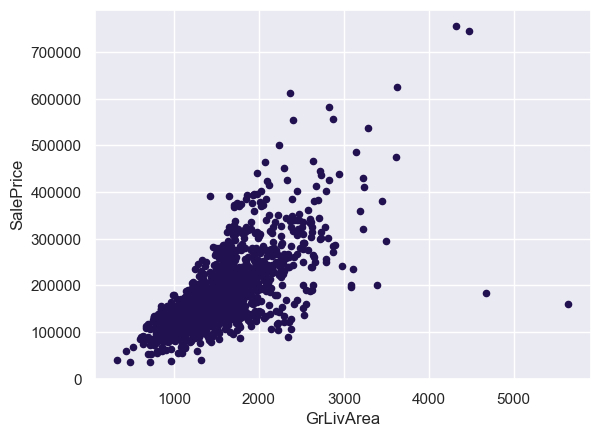

In [15]:
df_train.plot.scatter(x='GrLivArea', y='SalePrice')

### BoxPlot antara OverallQual dengan target varible

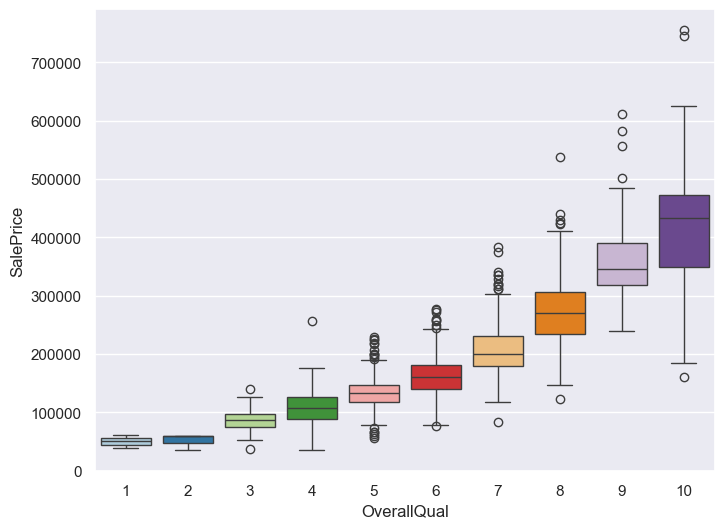

In [16]:
data = pd.concat([df_train['SalePrice'], df_train['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=data, palette="Paired")

In [17]:
# Terlihat beberapa anomaly diatas Upper Extreme Value (Q1-1.5*IQR) maupun dibawah Lower Extreme Value (Q3-1.5*IQR)
# Seperti pada SalePrice dibawah 200000 dengan OverallQual dengan nilai 10
print("dimana mean SalePrice (pada OverallQual = 10) adalah: " + str(df_train[(df_train['OverallQual']==10)]['SalePrice'].mean()))
df_train[(df_train['OverallQual']==10) & (df_train['SalePrice']<200000)]

dimana mean SalePrice (pada OverallQual = 10) adalah: 438588.3888888889


,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,MiscFeature,GarageArea,KitchenQual,SalePrice
523,40094,2007,10,5,4676,NaN,884,Ex,184750
1298,63887,2008,10,5,5642,NaN,1418,Ex,160000


### BoxPlot antara YearBuilt dengan Target Variable

In [18]:
print(df_train['YearBuilt'].min())
print(df_train['YearBuilt'].max())

1872
2010


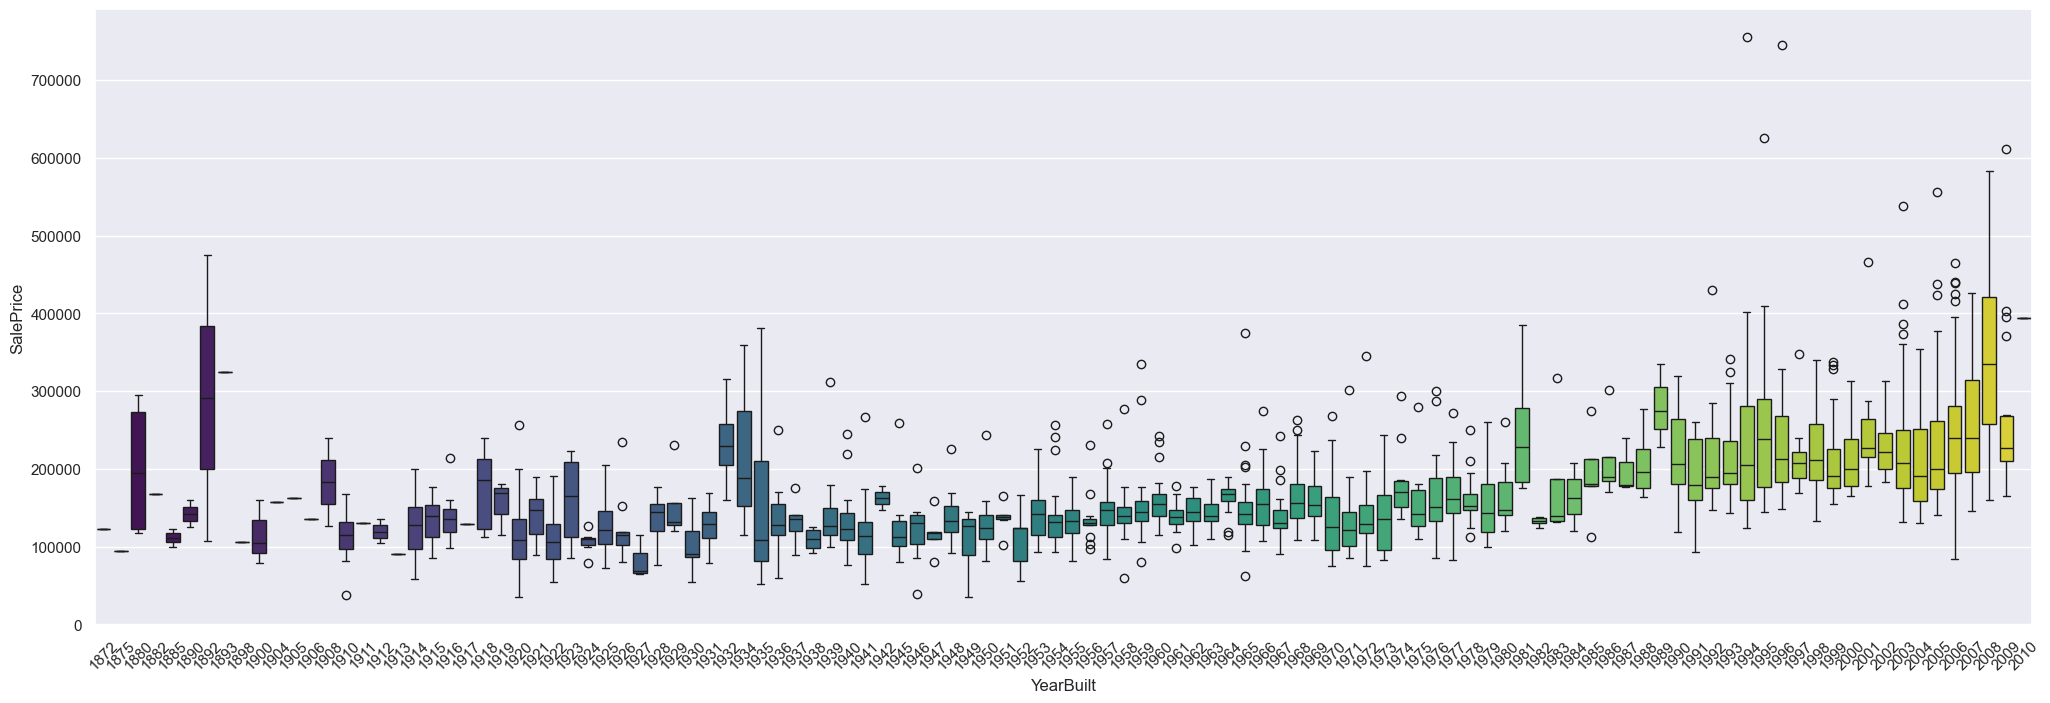

In [19]:
data = pd.concat([df_train['SalePrice'], df_train['YearBuilt']], axis=1)
f, ax = plt.subplots(figsize=(25, 8))
fig = sns.boxplot(x='YearBuilt', y="SalePrice", data=data, palette="viridis")
ax.tick_params(axis='x', labelrotation=45)

### Correlation Map  (Correlation Matrix) antar Variable

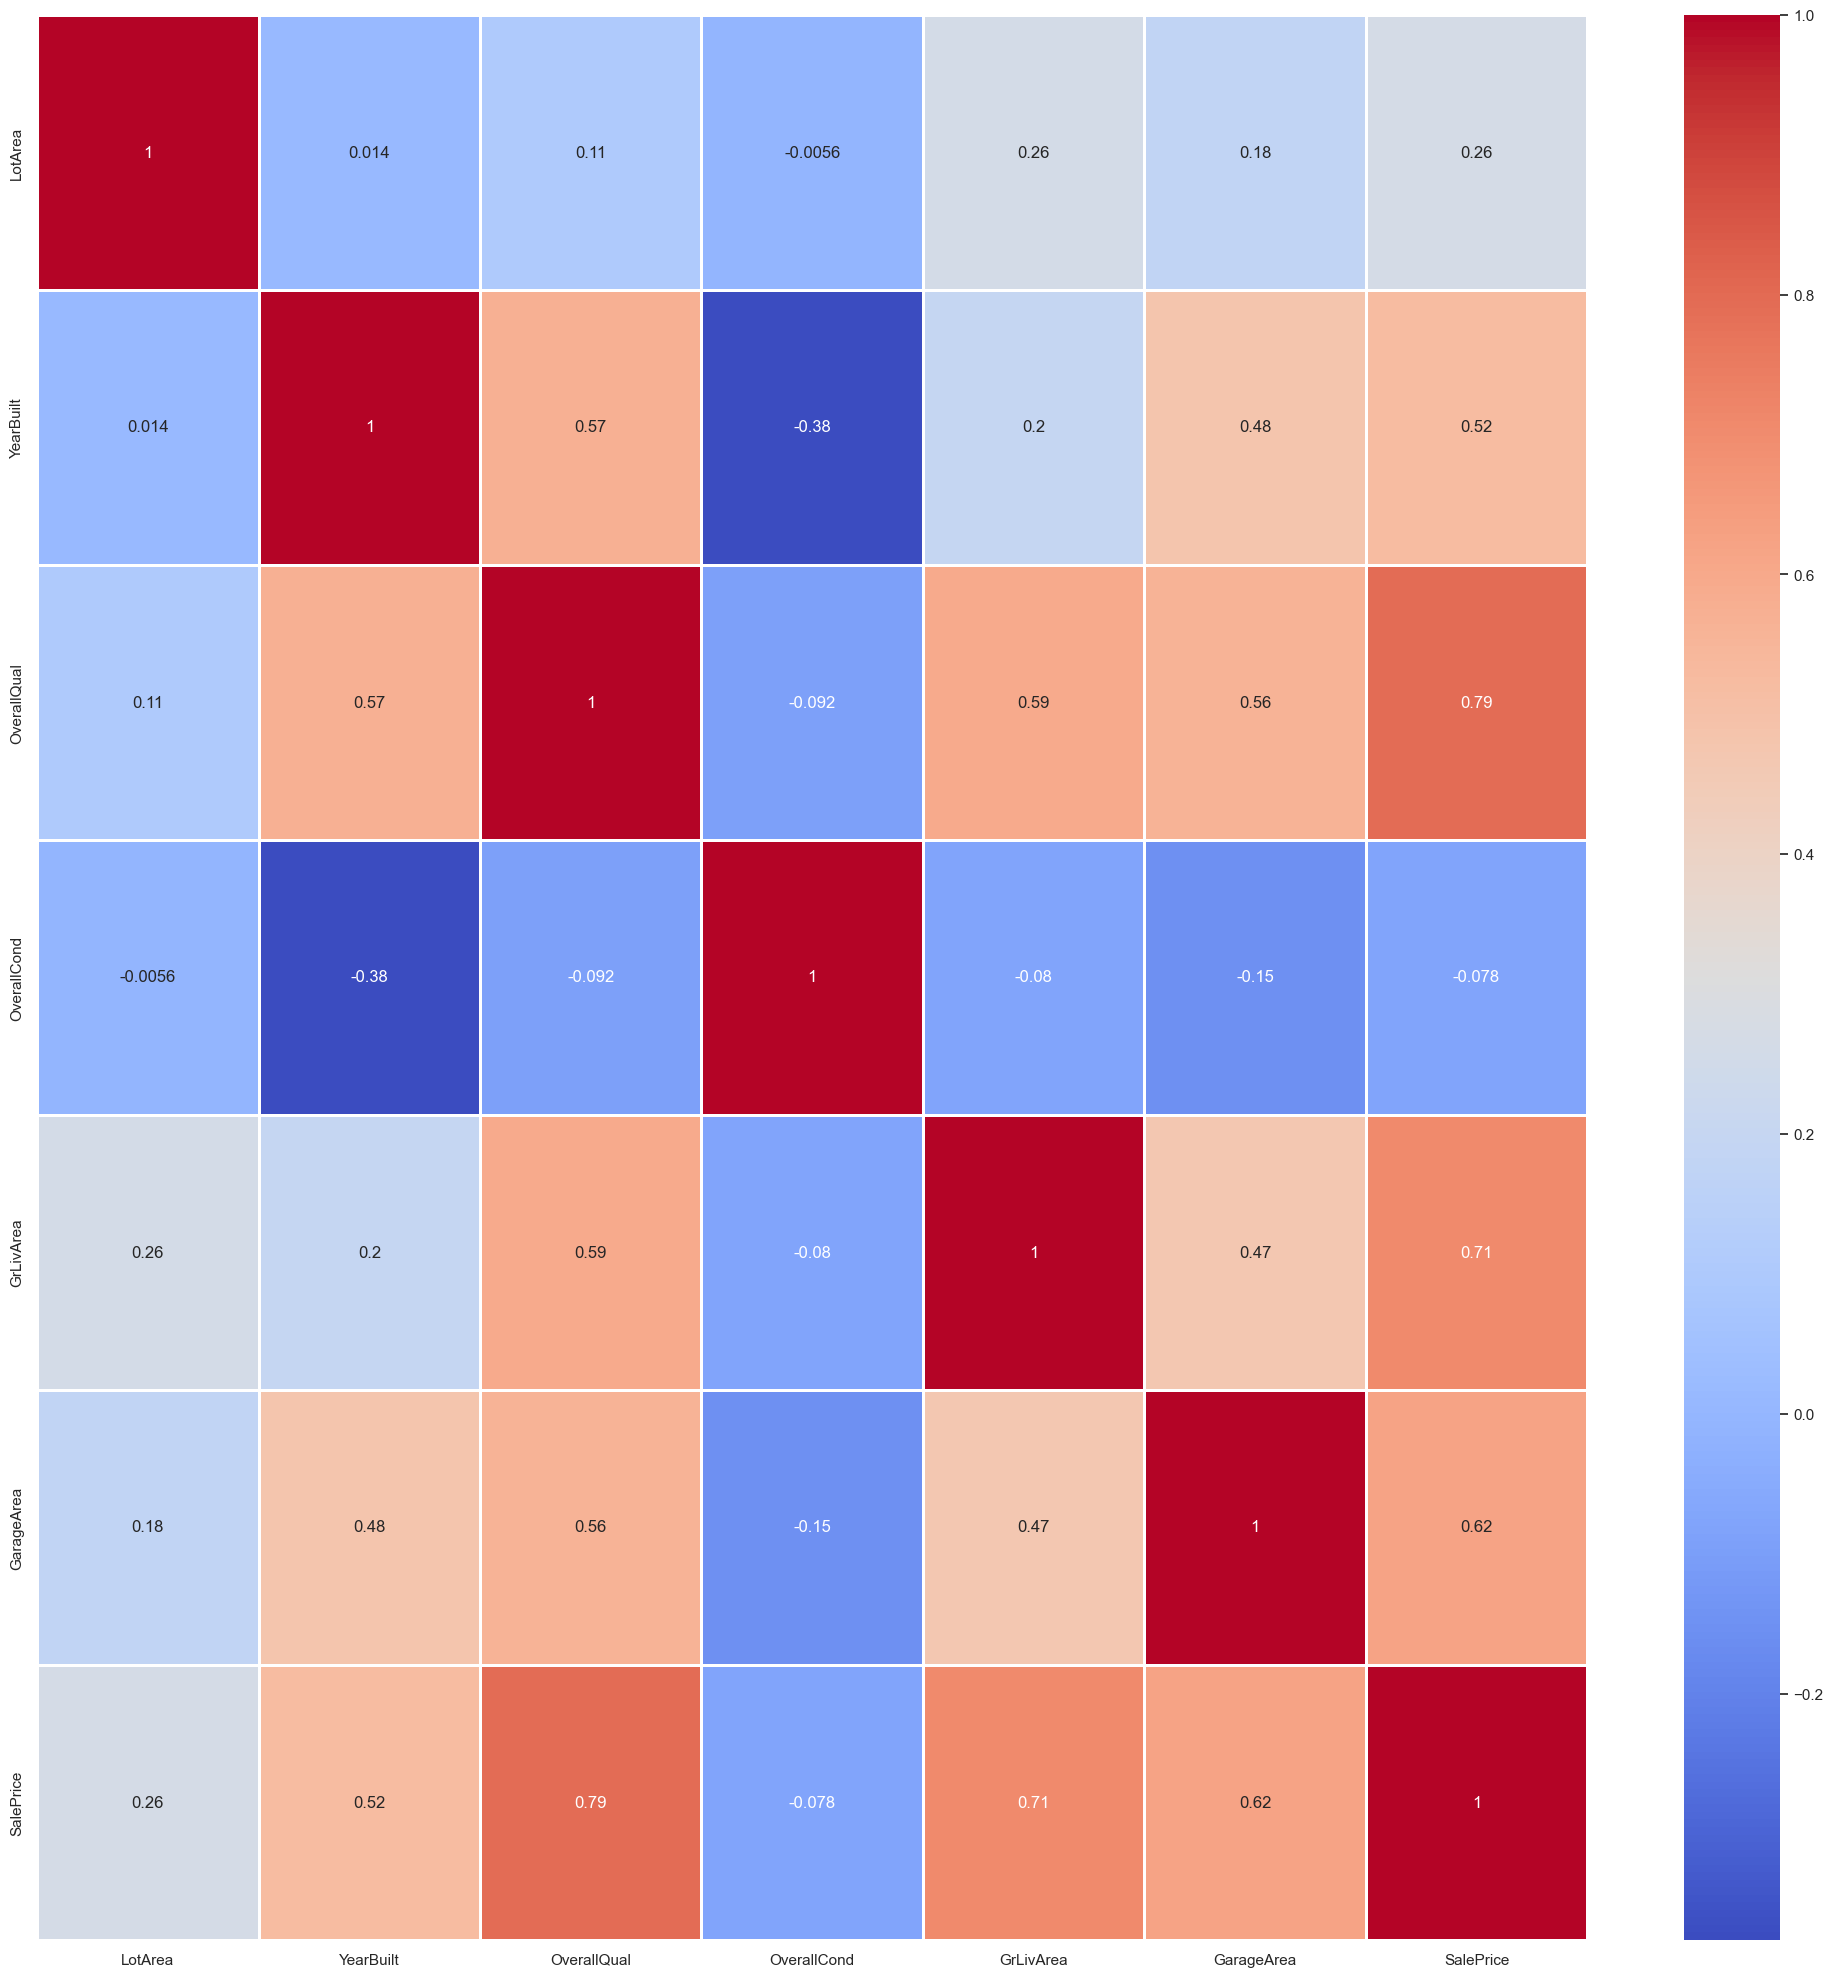

In [20]:
plt.figure(figsize=(25,25))
ax = sns.heatmap(df_train.corr(numeric_only=True), cmap = "coolwarm", annot=True, linewidth=2)

In [21]:
hig_corr = df_train.corr(numeric_only=True)
hig_corr["SalePrice"]

LotArea        0.263843
YearBuilt      0.522897
OverallQual    0.790982
OverallCond   -0.077856
GrLivArea      0.708624
GarageArea     0.623431
SalePrice      1.000000
Name: SalePrice, dtype: float64

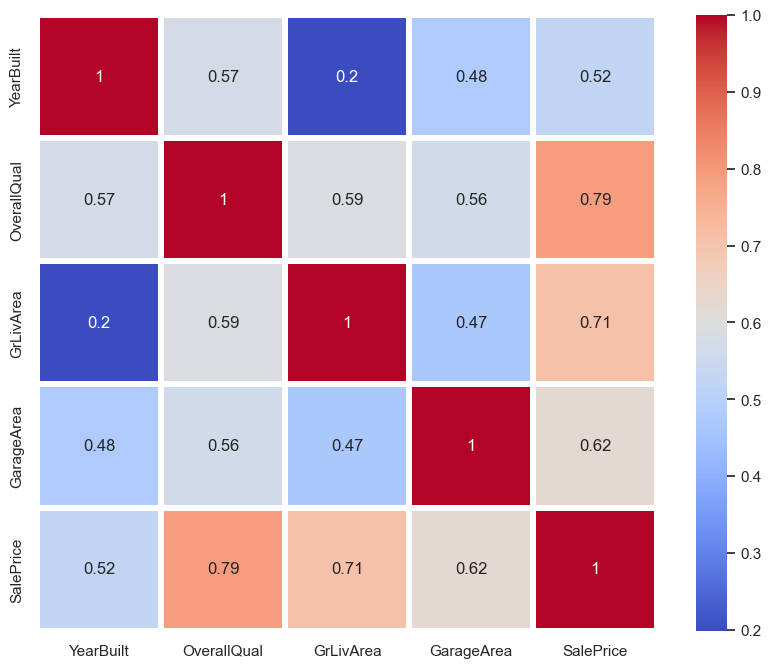

In [22]:
# tampilkan heatmap hanya untuk kolom2 yg nilai korelasinya dengan SalePrice >= 0.5
hig_corr_features = hig_corr.index[abs(hig_corr["SalePrice"]) >= 0.5]

plt.figure(figsize=(10,8))
ax = sns.heatmap(df_train[hig_corr_features].corr(), cmap = "coolwarm", annot=True, linewidth=3)

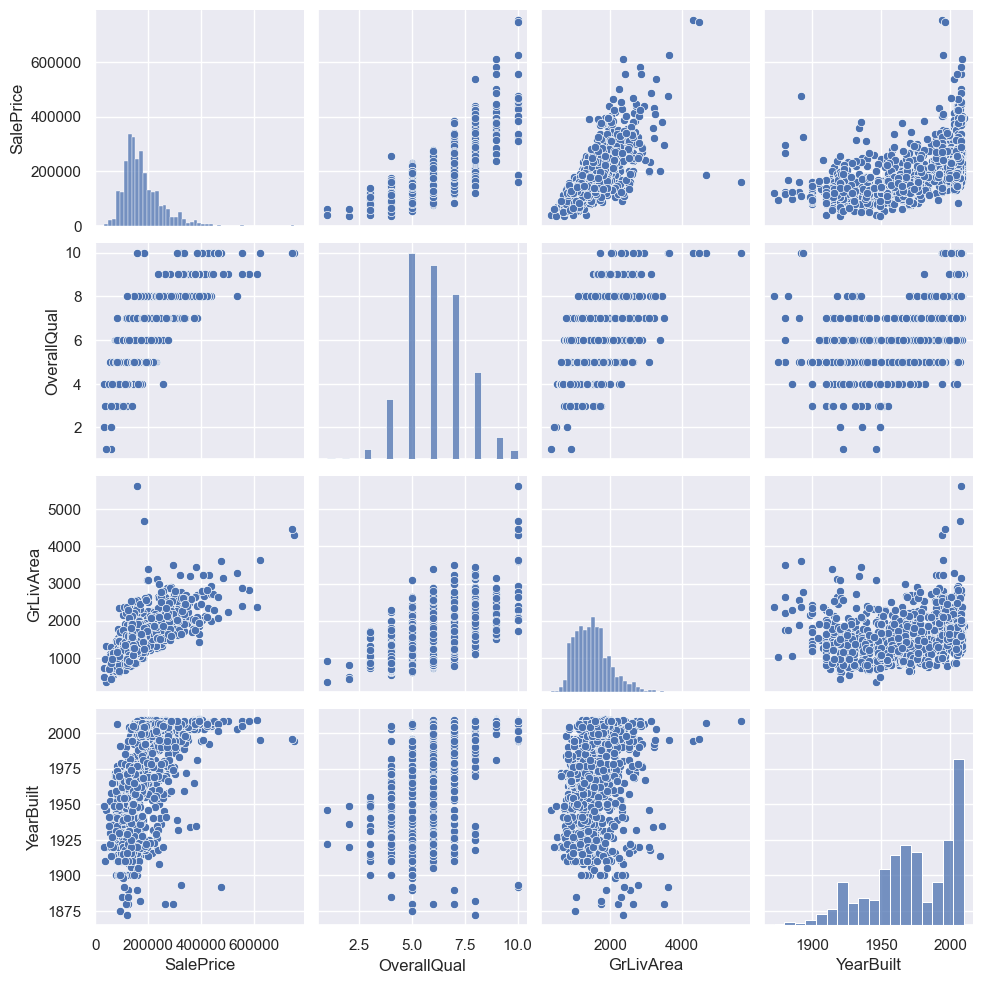

In [23]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show()

### Distribusi Target Variable

<Axes: xlabel='SalePrice', ylabel='Density'>

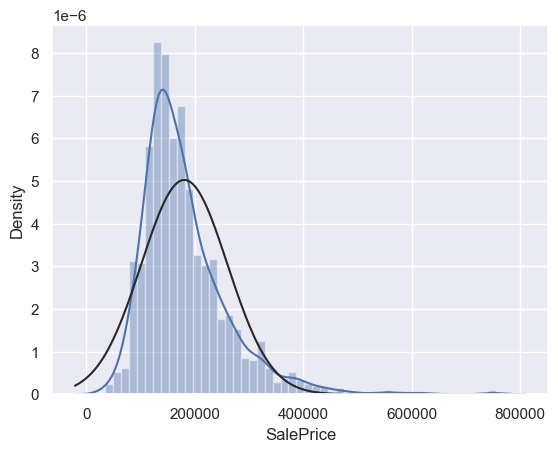

In [24]:
sns.distplot(df_train['SalePrice'], fit = norm)

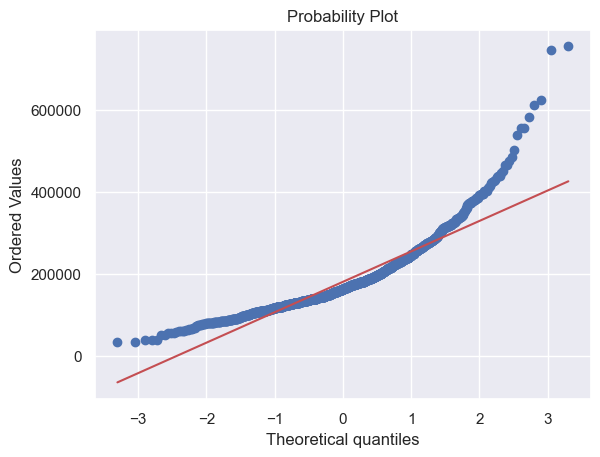

In [25]:
# QQ-plot
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

### Feature Transformation I: Log Transformation for Target Varible (SalePrice)

In [26]:
df_train_tf = df_train.copy()

In [27]:
df_train_tf["SalePrice"] = np.log1p(df_train["SalePrice"]) # log1p(x) --> e log(x+1)

<Axes: xlabel='SalePrice', ylabel='Density'>

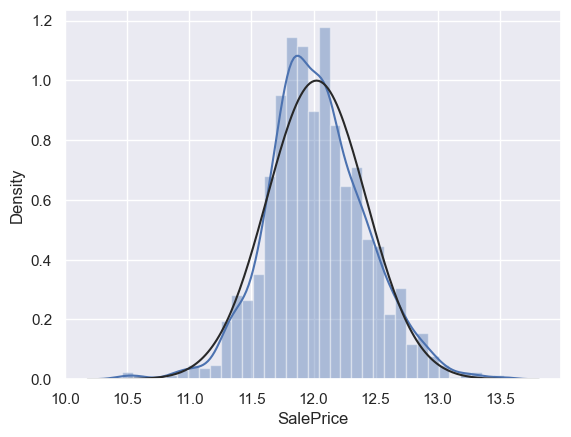

In [28]:
# Check the new distribution 
sns.distplot(df_train_tf['SalePrice'] , fit=norm)

In [29]:
df_train_tf

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,MiscFeature,GarageArea,KitchenQual,SalePrice
0,8450,2003,7,5,1710,NaN,548,Gd,12.247699
1,9600,1976,6,8,1262,NaN,460,TA,12.109016
2,11250,2001,7,5,1786,NaN,608,Gd,12.317171
3,9550,1915,7,5,1717,NaN,642,Gd,11.849405
4,14260,2000,8,5,2198,NaN,836,Gd,12.429220
...,...,...,...,...,...,...,...,...,...
1455,7917,1999,6,5,1647,NaN,460,TA,12.072547
1456,13175,1978,6,6,2073,NaN,500,TA,12.254868
1457,9042,1941,7,9,2340,Shed,252,Gd,12.493133
1458,9717,1950,5,6,1078,NaN,240,Gd,11.864469


In [30]:
df_train_tf['SalePrice'].describe()

count    1460.000000
mean       12.024057
std         0.399449
min        10.460271
25%        11.775105
50%        12.001512
75%        12.273736
max        13.534474
Name: SalePrice, dtype: float64

In [31]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

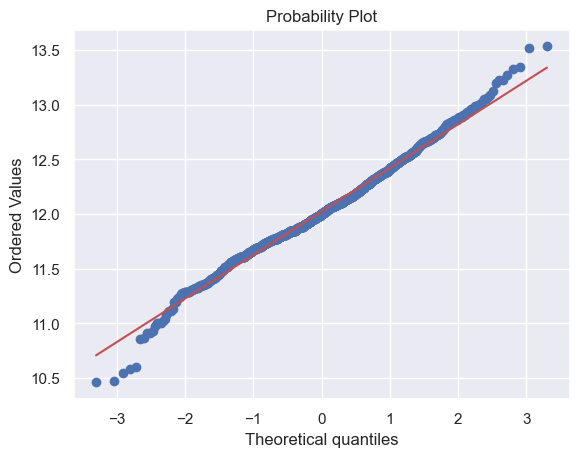

In [32]:
#QQ Plot
fig = plt.figure()
res = stats.probplot(df_train_tf['SalePrice'], plot=plt)
plt.show()

### Sebelum Feature Transformation berikutnya, data train set dan test set akan digabung untuk mempermudah prosesnya.

In [33]:
ntrain = df_train_tf.shape[0]
ntest = df_test.shape[0]
print(ntrain, ntest)
# Nilai diperlukan untuk melakukan split data nantinya

1460 1459


In [34]:
y_train = df_train_tf.SalePrice.values
#kita simpan SalePrice yang tidak akan masuk dalam penggabungan data

In [35]:
all_data = pd.concat((df_train_tf, df_test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2919, 8)


In [36]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotArea      2919 non-null   int64  
 1   YearBuilt    2919 non-null   int64  
 2   OverallQual  2919 non-null   int64  
 3   OverallCond  2919 non-null   int64  
 4   GrLivArea    2919 non-null   int64  
 5   MiscFeature  105 non-null    object 
 6   GarageArea   2918 non-null   float64
 7   KitchenQual  2918 non-null   object 
dtypes: float64(1), int64(5), object(2)
memory usage: 182.6+ KB


In [37]:
all_data.describe()

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,GarageArea
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000
mean,10168.114080,1971.312778,6.089072,5.564577,1500.759849,472.874572
std,7886.996359,30.291442,1.409947,1.113131,506.051045,215.394815
min,1300.000000,1872.000000,1.000000,1.000000,334.000000,0.000000
25%,7478.000000,1953.500000,5.000000,5.000000,1126.000000,320.000000
50%,9453.000000,1973.000000,6.000000,5.000000,1444.000000,480.000000
75%,11570.000000,2001.000000,7.000000,6.000000,1743.500000,576.000000
max,215245.000000,2010.000000,10.000000,9.000000,5642.000000,1488.000000


### Missing Value Analysis

In [38]:
total = all_data.isnull().sum().sort_values(ascending=False)
percent = (all_data.isnull().sum()/all_data.isnull().count() * 100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
MiscFeature,2814,96.402878
GarageArea,1,0.034258
KitchenQual,1,0.034258
LotArea,0,0.000000
YearBuilt,0,0.000000
OverallQual,0,0.000000
OverallCond,0,0.000000
GrLivArea,0,0.000000


In [39]:
# Mising data pada MiscFeature akan diisi dengan 'None'
all_data['MiscFeature'] = all_data['MiscFeature'].fillna('None')

In [40]:
# Missing data pada GarageArea akan diisi dengan 0
all_data['GarageArea'] = all_data['GarageArea'].fillna(0)

In [41]:
# Missing data pada KitchenQual akan diisi dengan Modus
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

In [42]:
#Check remaining missing values if any 
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


In [43]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotArea      2919 non-null   int64  
 1   YearBuilt    2919 non-null   int64  
 2   OverallQual  2919 non-null   int64  
 3   OverallCond  2919 non-null   int64  
 4   GrLivArea    2919 non-null   int64  
 5   MiscFeature  2919 non-null   object 
 6   GarageArea   2919 non-null   float64
 7   KitchenQual  2919 non-null   object 
dtypes: float64(1), int64(5), object(2)
memory usage: 182.6+ KB


### Feature Transformation II: Label Encoding

In [44]:
all_data.head()

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,MiscFeature,GarageArea,KitchenQual
0,8450,2003,7,5,1710,None,548.0,Gd
1,9600,1976,6,8,1262,None,460.0,TA
2,11250,2001,7,5,1786,None,608.0,Gd
3,9550,1915,7,5,1717,None,642.0,Gd
4,14260,2000,8,5,2198,None,836.0,Gd


In [45]:
# Ubah OverallQual dan OverallCond yang merupakan Fitur Numerik Ordinal menjadi string format
all_data['OverallQual'] = all_data['OverallQual'].astype(str)
all_data['OverallCond'] = all_data['OverallCond'].astype(str)

In [46]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotArea      2919 non-null   int64  
 1   YearBuilt    2919 non-null   int64  
 2   OverallQual  2919 non-null   object 
 3   OverallCond  2919 non-null   object 
 4   GrLivArea    2919 non-null   int64  
 5   MiscFeature  2919 non-null   object 
 6   GarageArea   2919 non-null   float64
 7   KitchenQual  2919 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 182.6+ KB


In [47]:
tmp_data = all_data.copy()

In [48]:
from sklearn.preprocessing import LabelEncoder
cols = ('OverallQual', 'OverallCond', 'KitchenQual') #masih sisa 'MiscFeature'
encoders = {}

for c in cols:
    lbl = LabelEncoder() # buat objek encoder
    lbl.fit(list(tmp_data[c].values)) # objek encoder mempelajari datanya
    tmp_data[c] = lbl.transform(list(tmp_data[c].values)) # objek encoder mengubah datanya
    encoders[c] = lbl # encoder untuk tiap kolom kita simpan untuk deployment nanti

# shape        
print('Shape tmp_data: {}'.format(tmp_data.shape))

Shape tmp_data: (2919, 8)


In [49]:
all_data

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,MiscFeature,GarageArea,KitchenQual
0,8450,2003,7,5,1710,None,548.0,Gd
1,9600,1976,6,8,1262,None,460.0,TA
2,11250,2001,7,5,1786,None,608.0,Gd
3,9550,1915,7,5,1717,None,642.0,Gd
4,14260,2000,8,5,2198,None,836.0,Gd
...,...,...,...,...,...,...,...,...
2914,1936,1970,4,7,1092,None,0.0,TA
2915,1894,1970,4,5,1092,None,286.0,TA
2916,20000,1960,5,7,1224,None,576.0,TA
2917,10441,1992,5,5,970,Shed,0.0,TA


In [50]:
print("OverallQual unique values: " + str(all_data['OverallQual'].unique()))
print("OverallCond unique values: " + str(all_data['OverallCond'].unique()))
print("KitchenQual unique values: " + str(all_data['KitchenQual'].unique()))

OverallQual unique values: ['7' '6' '8' '5' '9' '4' '10' '3' '1' '2']
OverallCond unique values: ['5' '8' '6' '7' '4' '2' '3' '9' '1']
KitchenQual unique values: ['Gd' 'TA' 'Ex' 'Fa']


In [51]:
tmp_data

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,MiscFeature,GarageArea,KitchenQual
0,8450,2003,7,4,1710,None,548.0,2
1,9600,1976,6,7,1262,None,460.0,3
2,11250,2001,7,4,1786,None,608.0,2
3,9550,1915,7,4,1717,None,642.0,2
4,14260,2000,8,4,2198,None,836.0,2
...,...,...,...,...,...,...,...,...
2914,1936,1970,4,6,1092,None,0.0,3
2915,1894,1970,4,4,1092,None,286.0,3
2916,20000,1960,5,6,1224,None,576.0,3
2917,10441,1992,5,4,970,Shed,0.0,3


In [52]:
print("OverallQual unique values: " + str(tmp_data['OverallQual'].unique()))
print("OverallCond unique values: " + str(tmp_data['OverallCond'].unique()))
print("KitchenQual unique values: " + str(tmp_data['KitchenQual'].unique()))

OverallQual unique values: [7 6 8 5 9 4 1 3 0 2]
OverallCond unique values: [4 7 5 6 3 1 2 8 0]
KitchenQual unique values: [2 3 0 1]


### Feature Transformation III: Skewness Treatment
- **Check the skewness**

In [53]:
from scipy.stats import norm, skew

numeric_feats = tmp_data.dtypes[tmp_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = tmp_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkewness in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness


Skewness in numerical features: 



,Skew
LotArea,12.822431
GrLivArea,1.269358
OverallCond,0.570312
GarageArea,0.239257
OverallQual,-0.326653
YearBuilt,-0.599806
KitchenQual,-1.448023


<Axes: xlabel='LotArea', ylabel='Density'>

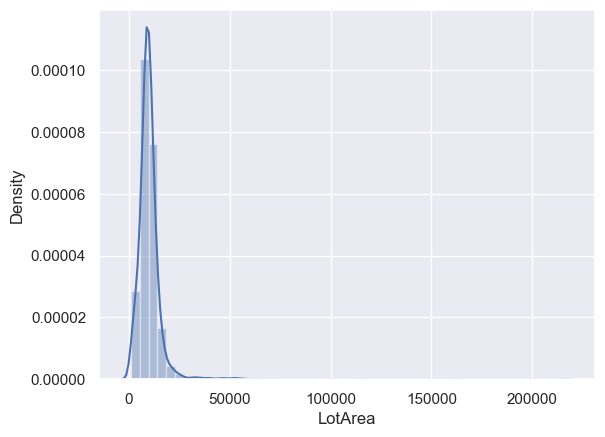

In [54]:
sns.distplot(tmp_data['LotArea'])

In [55]:
tmp_data['LotArea'].describe()

count      2919.000000
mean      10168.114080
std        7886.996359
min        1300.000000
25%        7478.000000
50%        9453.000000
75%       11570.000000
max      215245.000000
Name: LotArea, dtype: float64

- **Box Cox Transformation**

In [56]:
# lakukan box-cox transformation untuk feature2 yg nilai skewness-nya > 0.75 atau yg skewness-nya < -0.75
skewness = skewness[abs(skewness['Skew']) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

There are 3 skewed numerical features to Box Cox transform


In [57]:
# lakukan transformasi box cox
from scipy.special import boxcox1p

skewed_features = skewness.index
lam = 0.20
for feat in skewed_features:
    tmp_data[feat] = boxcox1p(tmp_data[feat], lam)

In [58]:
tmp_data

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,MiscFeature,GarageArea,KitchenQual
0,25.503637,2003,7,4,17.162564,None,548.0,1.228655
1,26.291998,1976,6,7,15.856944,None,460.0,1.597540
2,27.300424,2001,7,4,17.356042,None,608.0,1.228655
3,26.259338,1915,7,4,17.180669,None,642.0,1.228655
4,28.868815,2000,8,4,18.303173,None,836.0,1.228655
...,...,...,...,...,...,...,...,...
2914,17.719351,1970,4,6,15.262547,None,0.0,1.597540
2915,17.619961,1970,4,4,15.262547,None,286.0,1.597540
2916,31.239346,1960,5,6,15.729901,None,576.0,1.597540
2917,26.821947,1992,5,4,14.788544,Shed,0.0,1.597540


- **Check kembali skewness setelah Box Cox Transformation**

In [59]:
# Check the skew of all numerical features
skewed_feats = tmp_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness


Skew in numerical features: 



,Skew
OverallCond,0.570312
LotArea,0.496692
GarageArea,0.239257
GrLivArea,0.230000
OverallQual,-0.326653
YearBuilt,-0.599806
KitchenQual,-2.156088


### Feature Transformation IV: One-Hot Encoding untuk MiscFeature

In [60]:
tmp_data = pd.get_dummies(tmp_data, drop_first=True, dtype=int) # one hot encoding untuk fitur kategorikal di dataset
print(tmp_data.shape)

(2919, 11)


In [61]:
tmp_data

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,GarageArea,KitchenQual,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC
0,25.503637,2003,7,4,17.162564,548.0,1.228655,1,0,0,0
1,26.291998,1976,6,7,15.856944,460.0,1.597540,1,0,0,0
2,27.300424,2001,7,4,17.356042,608.0,1.228655,1,0,0,0
3,26.259338,1915,7,4,17.180669,642.0,1.228655,1,0,0,0
4,28.868815,2000,8,4,18.303173,836.0,1.228655,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2914,17.719351,1970,4,6,15.262547,0.0,1.597540,1,0,0,0
2915,17.619961,1970,4,4,15.262547,286.0,1.597540,1,0,0,0
2916,31.239346,1960,5,6,15.729901,576.0,1.597540,1,0,0,0
2917,26.821947,1992,5,4,14.788544,0.0,1.597540,0,0,1,0


In [62]:
#kita simpan kolom2 hasil encoding untuk digunakan nanti
one_hot_columns = tmp_data.columns 

### Feature Transformation V: Scaling

In [63]:
# menggunakan robust scaler untuk mengurangi dampak outlier di tiap kolom
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(tmp_data)
tmp_data = scaler.transform(tmp_data)

In [64]:
pd.DataFrame(tmp_data)

,0,1,2,3,4,5,6,7,8,9,10
0,-0.254874,0.631579,0.5,0.0,0.395595,0.265625,-1.0,0.0,0.0,0.0,0.0
1,0.035514,0.063158,0.0,3.0,-0.305745,-0.078125,0.0,0.0,0.0,0.0,0.0
2,0.406961,0.589474,0.5,0.0,0.499525,0.500000,-1.0,0.0,0.0,0.0,0.0
3,0.023483,-1.221053,0.5,0.0,0.405320,0.632812,-1.0,0.0,0.0,0.0,0.0
4,0.984668,0.568421,1.0,0.0,1.008295,1.390625,-1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2914,-3.122167,-0.063158,-1.0,2.0,-0.625037,-1.875000,0.0,0.0,0.0,0.0,0.0
2915,-3.158777,-0.063158,-1.0,0.0,-0.625037,-0.757812,0.0,0.0,0.0,0.0,0.0
2916,1.857838,-0.273684,-0.5,2.0,-0.373989,0.375000,0.0,0.0,0.0,0.0,0.0
2917,0.230717,0.400000,-0.5,0.0,-0.879657,-1.875000,0.0,-1.0,0.0,1.0,0.0


Kita selesai dengan Feature Transformation

### Split Kembali Data Training dan Testing 

In [65]:
X_train = tmp_data[:ntrain]
X_test = tmp_data[ntrain:]

X_train.shape, X_test.shape, y_train.shape

((1460, 11), (1459, 11), (1460,))

# Modeling

In [66]:
# Mari gunakan KFold dan buat function untuk melihat score performa model saat training
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score, mean_absolute_error, root_mean_squared_error, f1_score

# fungsi untuk melakukan cross validation
def test_model(model, X_train=X_train, y_train=y_train):
    cv = KFold(n_splits = 4, shuffle=True, random_state = 45)
    r2 = make_scorer(r2_score)
    f1 = make_scorer(f1_score)
    mae = make_scorer(mean_absolute_error)
    rmse = make_scorer(root_mean_squared_error)
    
    r2_val_score = cross_val_score(model, X_train, y_train, cv=cv, scoring = r2)
    mae_val_score = cross_val_score(model, X_train, y_train, cv=cv, scoring = mae) 
    rmse_val_score = cross_val_score(model, X_train, y_train, cv=cv, scoring = rmse) 
    score = [r2_val_score.mean(), mae_val_score.mean(), rmse_val_score.mean()]
    return score

## Linear Regression

In [67]:
import sklearn.linear_model as linear_model
LR = linear_model.LinearRegression()
test_model(LR)

[0.8273595400084588, 0.11384677778215879, 0.16486954416515578]

## Lasso Regression

In [68]:
lasso = linear_model.Lasso(alpha=1e-4)
test_model(lasso)

[0.828304803043606, 0.11350564841590831, 0.1644093423351941]

### Support Vector Regression (SVR)

In [69]:
from sklearn.svm import SVR
svr_reg = SVR(kernel= 'rbf')
test_model(svr_reg)

[0.8358727426984076, 0.11101570451814348, 0.1615480425624451]

### XGBoost

In [70]:
import xgboost

xgb_reg = xgboost.XGBRegressor()
test_model(xgb_reg)

[0.8098749535594161, 0.11850677758670869, 0.173397149462481]

# Periksa Distribusi Residual (Error)

<Axes: ylabel='Density'>

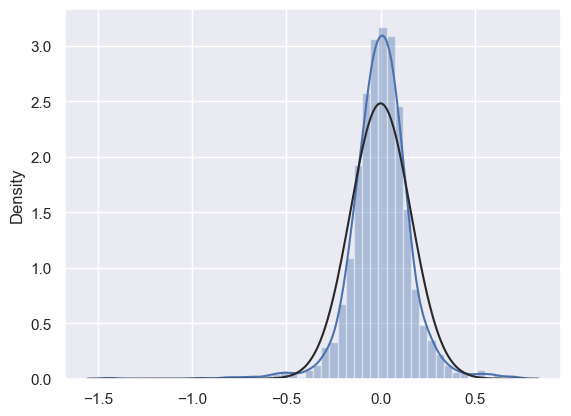

In [71]:
# bangun model LinReg untuk memprediksi harga rumah dari data training
model = LR.fit(X_train, y_train) 
y_train_pred = model.predict(X_train)
residuals = y_train - y_train_pred
sns.distplot(residuals , fit=norm)

<Axes: ylabel='Density'>

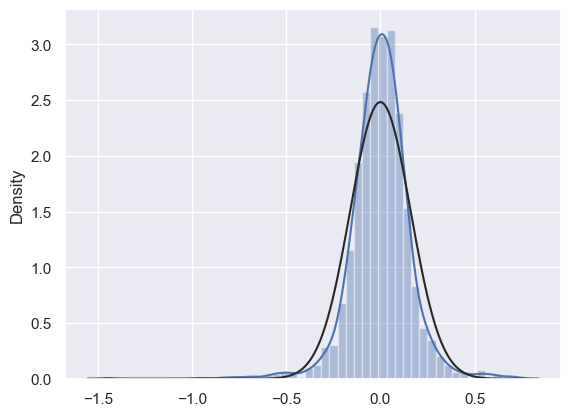

In [72]:
# bangun model Lasso untuk memprediksi harga rumah dari data training
model = lasso.fit(X_train, y_train) 
y_train_pred = model.predict(X_train)
residuals = y_train - y_train_pred
sns.distplot(residuals , fit=norm)

<Axes: ylabel='Density'>

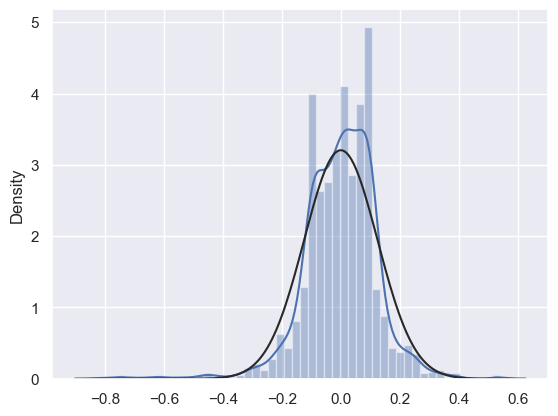

In [73]:
# bangun model SVR untuk memprediksi harga rumah dari data training
model = svr_reg.fit(X_train, y_train) 
y_train_pred = model.predict(X_train)
residuals = y_train - y_train_pred
sns.distplot(residuals , fit=norm)

<Axes: ylabel='Density'>

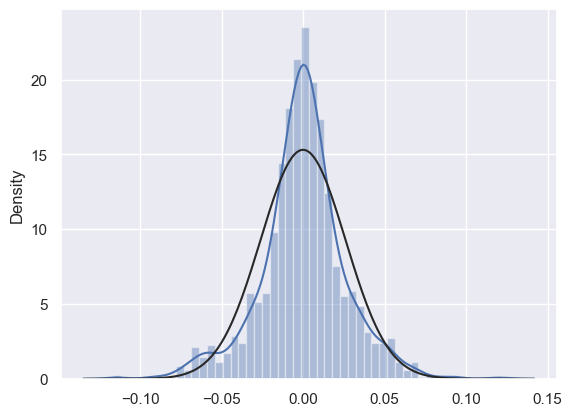

In [74]:
# bangun model XGBoost untuk memprediksi harga rumah dari data training
model = xgb_reg.fit(X_train, y_train) 
y_train_pred = model.predict(X_train)
residuals = y_train - y_train_pred
sns.distplot(residuals , fit=norm)

## Let's Dig Deep into the Prediction result

In [75]:
pd.DataFrame(tmp_data)

,0,1,2,3,4,5,6,7,8,9,10
0,-0.254874,0.631579,0.5,0.0,0.395595,0.265625,-1.0,0.0,0.0,0.0,0.0
1,0.035514,0.063158,0.0,3.0,-0.305745,-0.078125,0.0,0.0,0.0,0.0,0.0
2,0.406961,0.589474,0.5,0.0,0.499525,0.500000,-1.0,0.0,0.0,0.0,0.0
3,0.023483,-1.221053,0.5,0.0,0.405320,0.632812,-1.0,0.0,0.0,0.0,0.0
4,0.984668,0.568421,1.0,0.0,1.008295,1.390625,-1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2914,-3.122167,-0.063158,-1.0,2.0,-0.625037,-1.875000,0.0,0.0,0.0,0.0,0.0
2915,-3.158777,-0.063158,-1.0,0.0,-0.625037,-0.757812,0.0,0.0,0.0,0.0,0.0
2916,1.857838,-0.273684,-0.5,2.0,-0.373989,0.375000,0.0,0.0,0.0,0.0,0.0
2917,0.230717,0.400000,-0.5,0.0,-0.879657,-1.875000,0.0,-1.0,0.0,1.0,0.0


In [76]:
print("SalePrice pada data Temp[0]: " + str(np.expm1(float(model.predict(tmp_data[0].reshape(1,-1))))))

SalePrice pada data Temp[0]: 206571.97986936808


In [77]:
print("SalePrice real data: " + str(np.expm1(y_train[0])))

SalePrice real data: 208499.99999999983


In [78]:
print("Nilai error real: " + str(np.expm1(y_train[0])-np.expm1(float(model.predict(tmp_data[0].reshape(1,-1))))))

Nilai error real: 1928.0201306317467


In [79]:
# Coba input data baru untuk diprediksi berapa harga rumahnya 
data_baru = {'LotArea': [8000], 
             'YearBuilt':[2010], 
             'OverallQual':['8'], 
             'OverallCond':['7'], 
             'GrLivArea':[2000],
            'MiscFeature':['Shed'], 
             'GarageArea': [500], 
             'KitchenQual': ['Gd']}

In [80]:
tmp = pd.DataFrame(data_baru)
tmp

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,MiscFeature,GarageArea,KitchenQual
0,8000,2010,8,7,2000,Shed,500,Gd


In [81]:
data_baru_tf = data_baru.copy()

In [82]:
#pre processing label encoding untuk data baru
data_baru_tf['OverallQual'] = encoders['OverallQual'].transform(tmp['OverallQual'])[0] 
data_baru_tf['OverallCond'] = encoders['OverallCond'].transform(tmp['OverallCond'])[0]
data_baru_tf['KitchenQual'] = encoders['KitchenQual'].transform(tmp['KitchenQual'])[0]
# transformasi boxcox untuk kolom LotArea, GrLivArea, dan KitchenQual
data_baru_tf['LotArea'] = boxcox1p(tmp['LotArea'], lam)[0]
data_baru_tf['GrLivArea'] = boxcox1p(tmp['GrLivArea'], lam)[0]
data_baru_tf['KitchenQual'] = boxcox1p(data_baru_tf['KitchenQual'], lam)

In [83]:
tmp = pd.DataFrame(data_baru_tf)
tmp

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,MiscFeature,GarageArea,KitchenQual
0,25.171636,2010,8,6,17.867539,Shed,500,1.228655


In [84]:
tmp = pd.get_dummies(tmp, columns = ['MiscFeature'])
tmp

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,GarageArea,KitchenQual,MiscFeature_Shed
0,25.171636,2010,8,6,17.867539,500,1.228655,True


In [85]:
one_hot_columns #ingat, perlu tambahkan kolom hasil one-hot encoding lainnya seperti di data training

Index(['LotArea', 'YearBuilt', 'OverallQual', 'OverallCond', 'GrLivArea',
       'GarageArea', 'KitchenQual', 'MiscFeature_None', 'MiscFeature_Othr',
       'MiscFeature_Shed', 'MiscFeature_TenC'],
      dtype='object')

In [86]:
# Menambahkan kolom-kolom yang hilang pada data baru
for kolom in one_hot_columns:
    if kolom not in tmp.columns:
        tmp[kolom] = 0

In [87]:
# jangan lupa lakukan scaling
tmp_scaled = scaler.transform(tmp.loc[0].values.reshape(1,-1))

In [88]:
y = np.expm1(model.predict(tmp_scaled))
print(y)

[273993.56]


In [89]:
data_baru['SalePrice'] = y

In [90]:
pd.DataFrame(data_baru)

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,MiscFeature,GarageArea,KitchenQual,SalePrice
0,8000,2010,8,7,2000,Shed,500,Gd,273993.5625


# Lakukan instruksi berikut dan jawablah pertanyannya.

- [INSTRUKSI] Ulangi jalankan notebook dari awal mulai dari import dataset sampai akhir tahap 'Periksa Distribusi Residual' (menampilkan visualisasi distribusinya), TETAPI lakukan beberapa perubahan untuk MENGHAPUS semua cell yang berfungsi untuk melakukan transformasi kolom, baik kolom fitur maupun target (artinya biarkan distribusi kolom sesuai data original apa adanya).

- [PERTANYAAN] Apakah distribusi residualnya masih normal? Menurut Anda, apa kesimpulan eksperimen kedua regresi linear ini?

# [Jawaban] Mohon lihat Notebook Answer.ipynb

### Let's make regression using ANN

In [102]:
import tensorflow as tf
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=0)

print('Lenght of training data:',len(X_train))
print('Lenght of testing data:',len(X_val))

Lenght of training data: 934
Lenght of testing data: 234


In [103]:
X_train.shape

(934, 11)

In [107]:
model = Sequential()

# input layer
model.add(Input(shape=(11,)))

# hidden layers
model.add(Dense(32,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))

# output layer
model.add(Dense(1,activation='linear'))

model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mape', tf.keras.metrics.R2Score])

model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_63 (Dense)                │ (None, 32)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 87,105 (340.25 KB)

 Trainable params: 87,105 (340.25 KB)

 Non-trainable params: 0 (0.00 B)

In [108]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_loss',
    patience = 50
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=20, min_lr=1e-9)

callbacks = [early_stopping, reduce_lr]

In [109]:
model.fit(x=X_train,y=y_train,validation_data=(X_val,y_val),batch_size=256,epochs=400, callbacks=callbacks)

Epoch 1/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - loss: 139.5866 - mae: 11.8073 - mape: 98.1718 - r2_score: -872.9498 - val_loss: 125.1871 - val_mae: 11.1797 - val_mape: 93.1084 - val_r2_score: -801.8274 - learning_rate: 0.0010
Epoch 2/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 116.5679 - mae: 10.7681 - mape: 89.5105 - r2_score: -709.6276 - val_loss: 86.5959 - val_mae: 9.2285 - val_mape: 76.9203 - val_r2_score: -554.3414 - learning_rate: 0.0010
Epoch 3/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 71.0818 - mae: 8.1702 - mape: 68.0446 - r2_score: -453.0130 - val_loss: 28.4230 - val_mae: 4.7964 - val_mape: 39.9315 - val_r2_score: -181.2770 - learning_rate: 0.0010
Epoch 4/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 31.0988 - mae: 4.4900 - mape: 37.1980 - r2_score: -185.6190 - val_loss: 29.4768 - val_mae: 4.0769 - val_mape: 33.8447 - val_r2_score: -188.0355 - learning_rate: 0.0010
Epoch 5/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 40.1021 - mae: 4.5241 - mape: 37

In [110]:
y_predicted = model.predict(X_val)

print('r2 score:',r2_score(y_val,y_predicted))

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
r2 score: -5.480264332468872


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


<Axes: ylabel='Density'>

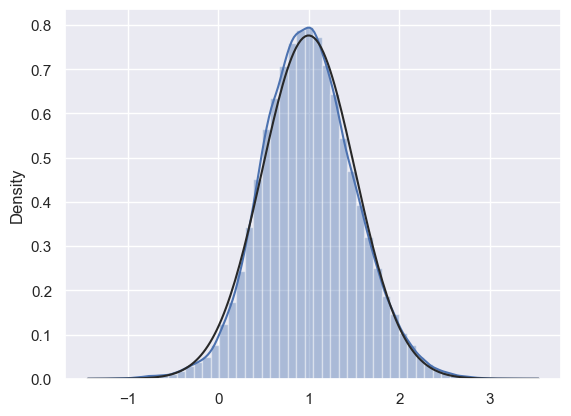

In [111]:
# bangun model ANN untuk memprediksi harga rumah dari data training 
y_train_pred = model.predict(X_val)
residuals = y_train - y_train_pred
sns.distplot(residuals , fit=norm)